1. 경유 등유 가격 비교
2. 지역별 유가 비교 (수도권과 지방의 차이)
3. 상표별 유가 비교
4. 셀프여부 가격 비교

### 필요한 라이브러리 임포트

In [129]:
import pandas as pd
import numpy as np
import bar_chart_race as bcr
import warnings
warnings.filterwarnings(action='ignore')

In [130]:
df1 = pd.read_csv('판매가격.csv')
df2 = pd.read_csv('판매가격(6월).csv')
df = pd.concat([df1,df2])
df

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220409.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220410.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220411.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220412.0,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,20220413.0,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114
...,...,...,...,...,...,...,...,...,...,...,...,...
308781,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220602.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308782,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220603.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308783,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220604.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000
308784,충북 충주시,희망주유소,충북 충주시 금봉대로 398,20220605.0,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000


### 데이터 구조 파악

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650485 entries, 0 to 308785
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      650485 non-null  object 
 1   상호      650485 non-null  object 
 2   주소      650485 non-null  object 
 3   기간      650485 non-null  float64
 4   상표      650485 non-null  object 
 5   셀프여부    650485 non-null  object 
 6   고급휘발유   650485 non-null  float64
 7   휘발유     650485 non-null  float64
 8   경유      650485 non-null  float64
 9   실내등유    650485 non-null  float64
 10  위도      650485 non-null  float64
 11  경도      650485 non-null  float64
dtypes: float64(7), object(5)
memory usage: 64.5+ MB


### 각 주유소의 주소를 시, 구로 구분

In [132]:
df['시'] = df['지역'].str.split(' ').str[0]
df['구'] = df['지역'].str.split(' ').str[1]
df['기간'] = pd.to_datetime(df['기간'],format='%Y%m%d')
df.head()

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도,시,구
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-09,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-10,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-11,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-12,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-13,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114,강원,강릉시


In [133]:
df['년'] = df['기간'].dt.year
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.day_name()
df.head()

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도,시,구,년,월,일,요일
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-09,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,9,Saturday
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-10,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,10,Sunday
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-11,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,11,Monday
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-12,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,12,Tuesday
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-13,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,13,Wednesday


### 셀프주유소 여부 비교

In [134]:
df['셀프여부'].value_counts()

일반    358826
셀프    291659
Name: 셀프여부, dtype: int64

### 휘발유나 경유 가격이 0인 이상치 제거

In [135]:
drop_df = df[(df['휘발유'] == 0)  | (df['경유'] ==0)]
df1 = df.drop(index=drop_df.index)
df1

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도,시,구,년,월,일,요일
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-09,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,9,Saturday
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-10,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,10,Sunday
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-11,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,11,Monday
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-12,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,12,Tuesday
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-13,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,13,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308781,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-02,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000,충북,충주시,2022,6,2,Thursday
308782,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-03,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000,충북,충주시,2022,6,3,Friday
308783,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-04,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000,충북,충주시,2022,6,4,Saturday
308784,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-05,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000,충북,충주시,2022,6,5,Sunday


### 데이터 시각화 폰트 설정

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 상표 및 셀프여부에 따른 분포 정리

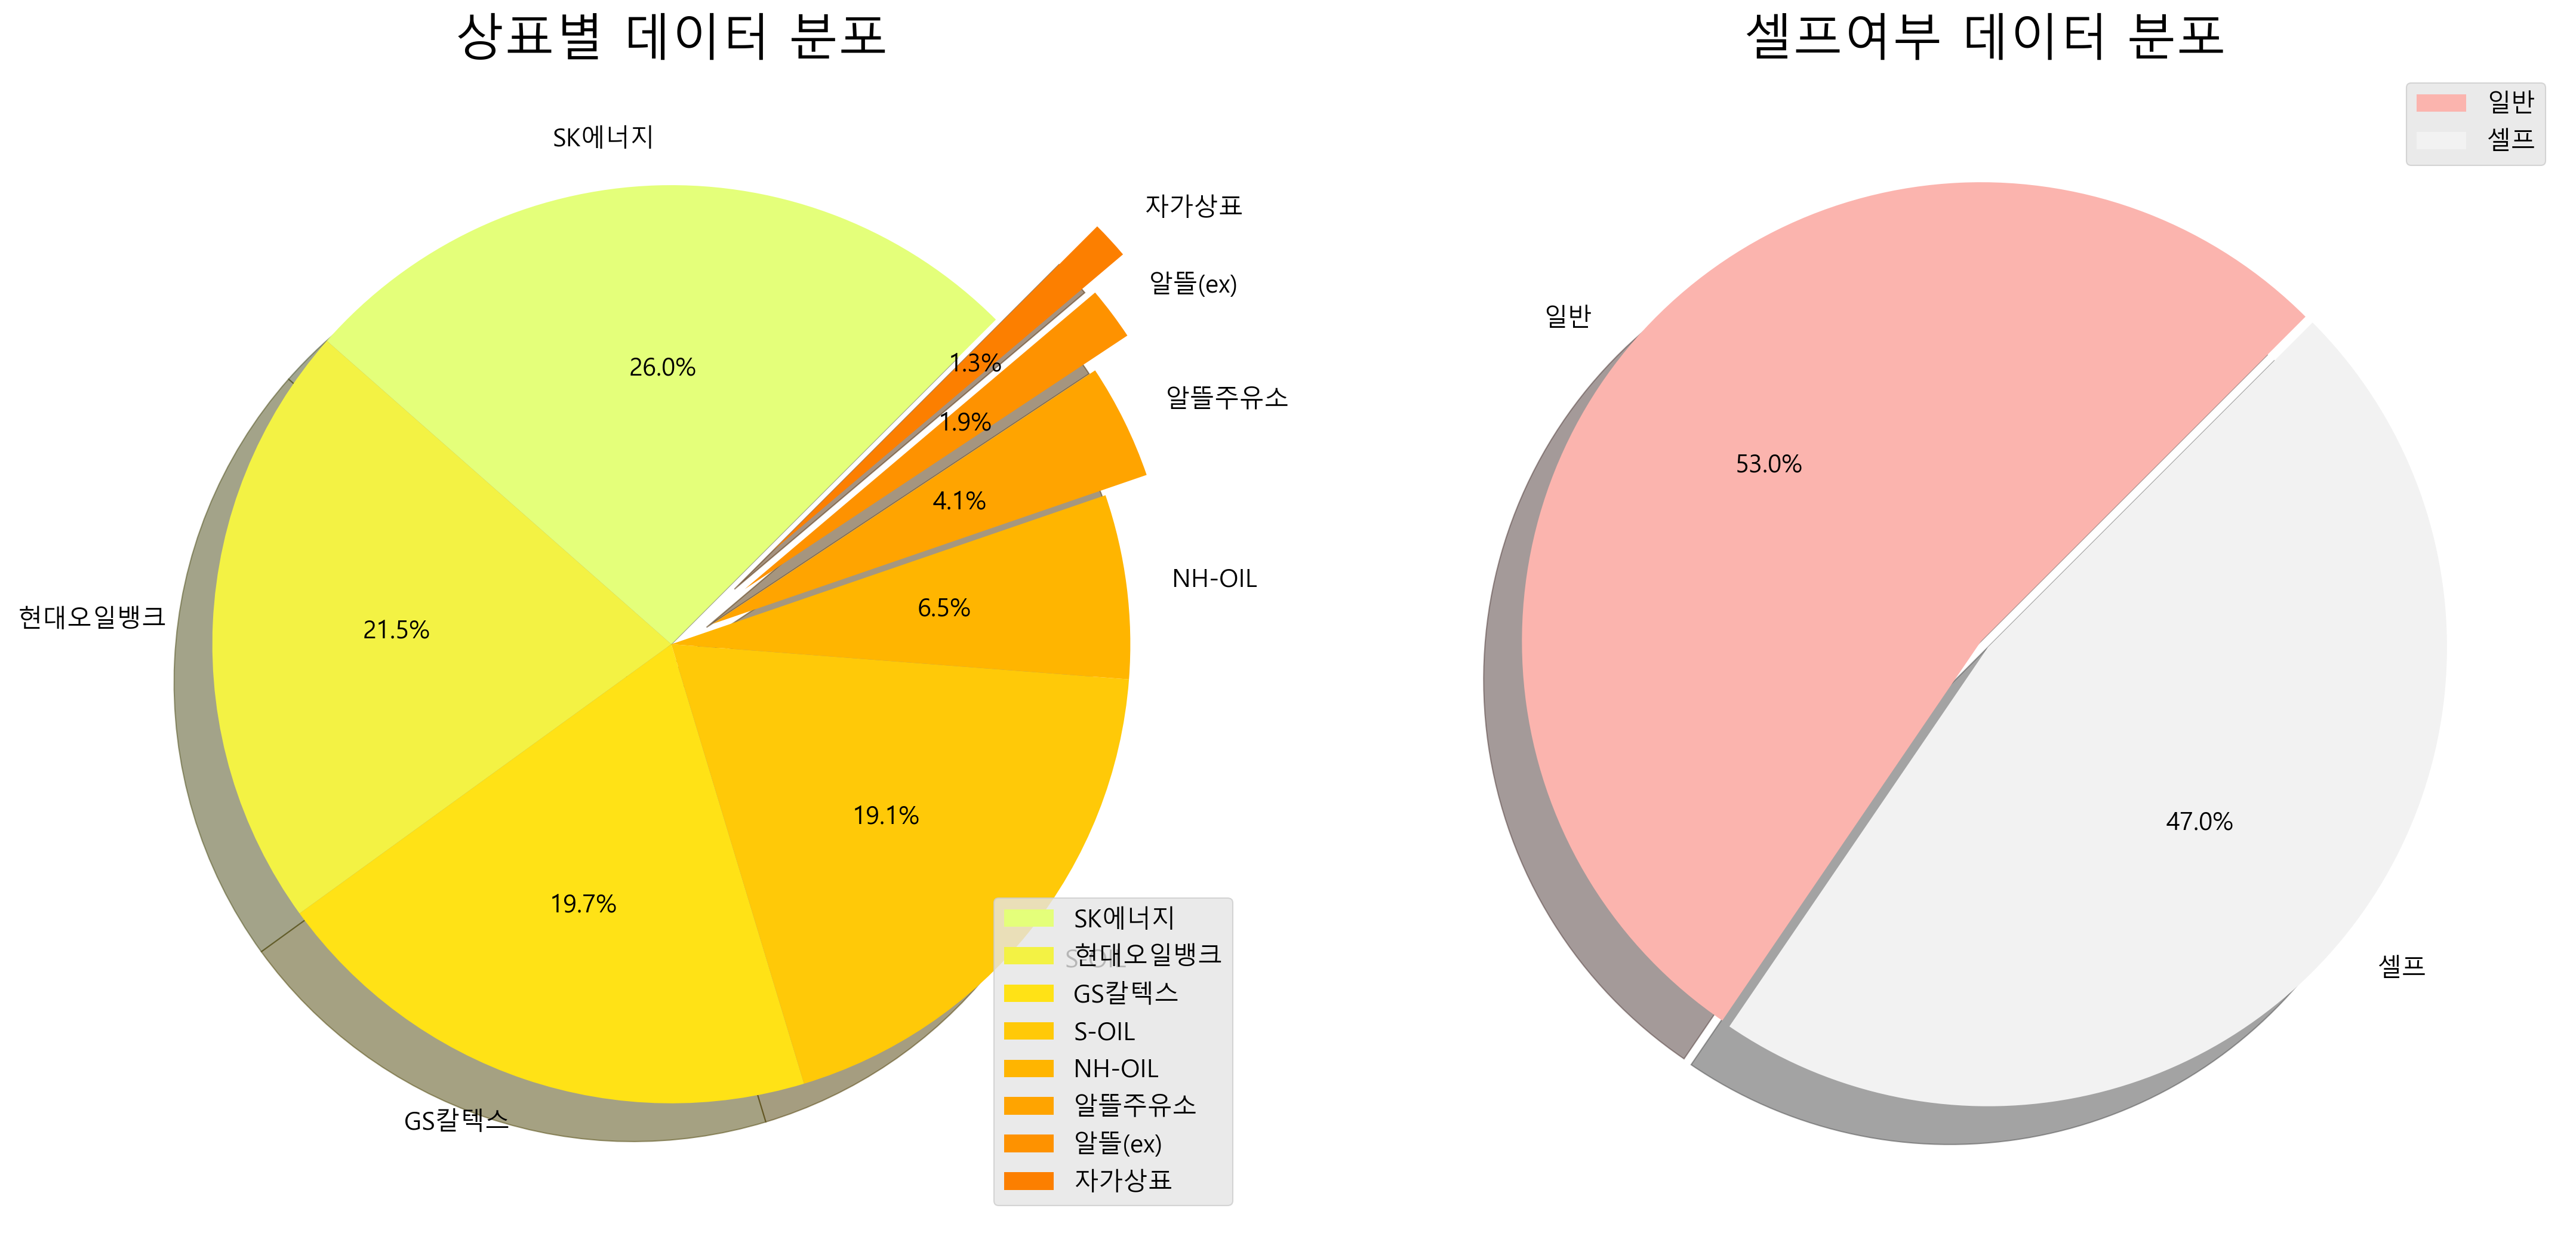

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15,7), dpi=300)

count_df = df1[['상호','상표','셀프여부']].drop_duplicates()

size = count_df['상표'].value_counts()
labels = count_df['상표'].value_counts().index
colors=plt.cm.Wistia(np.linspace(0,1,count_df['상표'].value_counts().shape[0]))
explode = [0,0,0,0,0,0.1,0.2,0.3]

ax[0].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[0].set_title('상표별 데이터 분포',fontsize=20)
ax[0].legend()


size = count_df['셀프여부'].value_counts()
labels = count_df['셀프여부'].value_counts().index
colors = plt.cm.Pastel1(np.linspace(0, 1, 2))
explode = [0.01, 0.01]

ax[1].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[1].set_title('셀프여부 데이터 분포',fontsize=20)
ax[1].legend()

plt.tight_layout()
plt.show()

### 셀프 주유소 여부 가격분포

셀프 주유소가 일반 주유소보다 더 저렴하게 분포되어있고 이상치(너무싸거나, 너무비싸거나)가 별로 없다

In [124]:
df_oil = df1.drop(['고급휘발유','경유','실내등유'],axis=1)
drop_df = df_oil[(df_oil['휘발유'] == 0)]
df_oil = df_oil.drop(index=drop_df.index)

<AxesSubplot:title={'center':'휘발유'}, xlabel='셀프여부'>

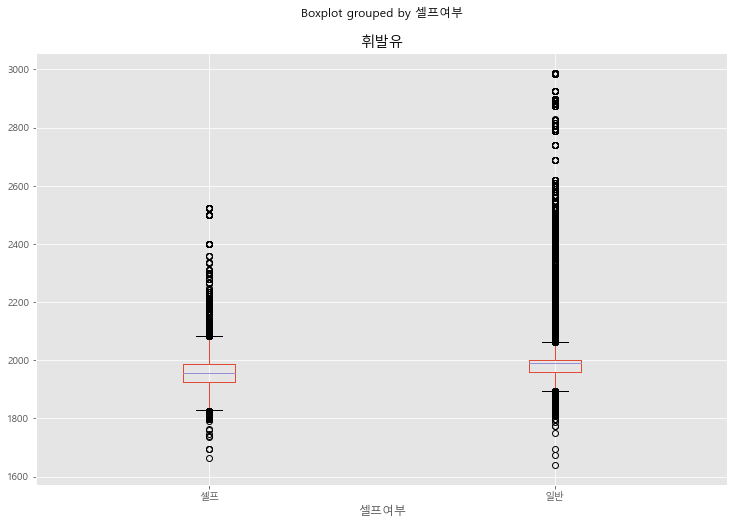

In [125]:
df_oil.boxplot(column="휘발유", by = '셀프여부', figsize=(12, 8))

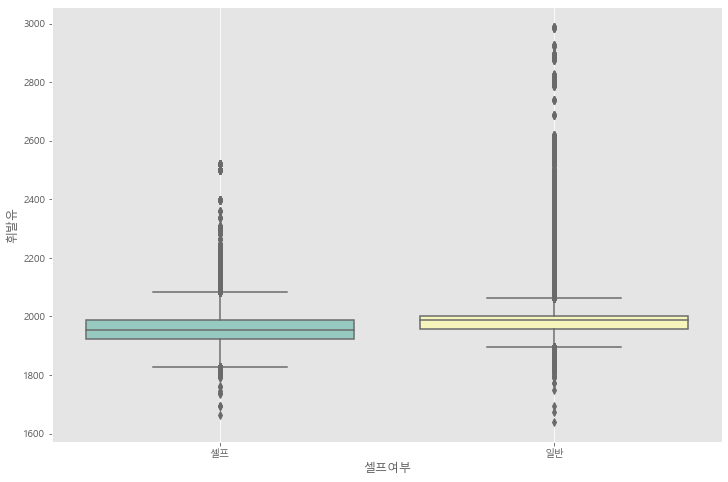

In [126]:
# Seaborn boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='셀프여부', y='휘발유', data=df_oil, palette="Set3")
plt.grid()
plt.show()

## 상표별 휘발유 분포

sk에너지와 gs칼텍스 경우는 특히 이상치들이 많고 박스들도 비교적 높게 형성

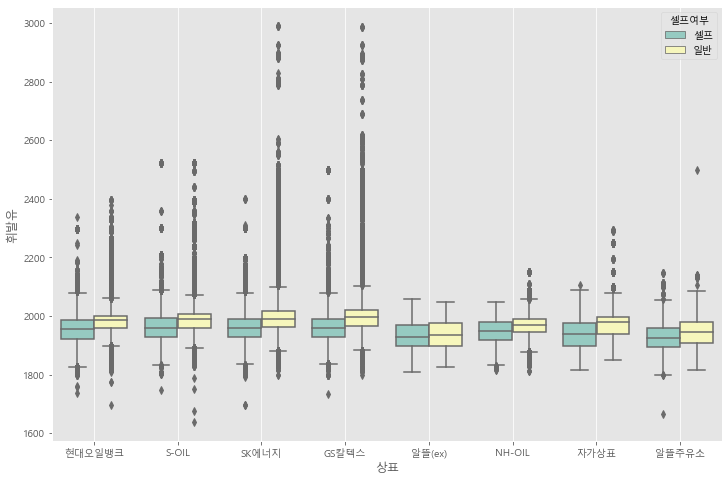

In [121]:
# Seaborn boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='휘발유', hue = '셀프여부', data=df_oil, palette="Set3")
plt.grid()
plt.show()

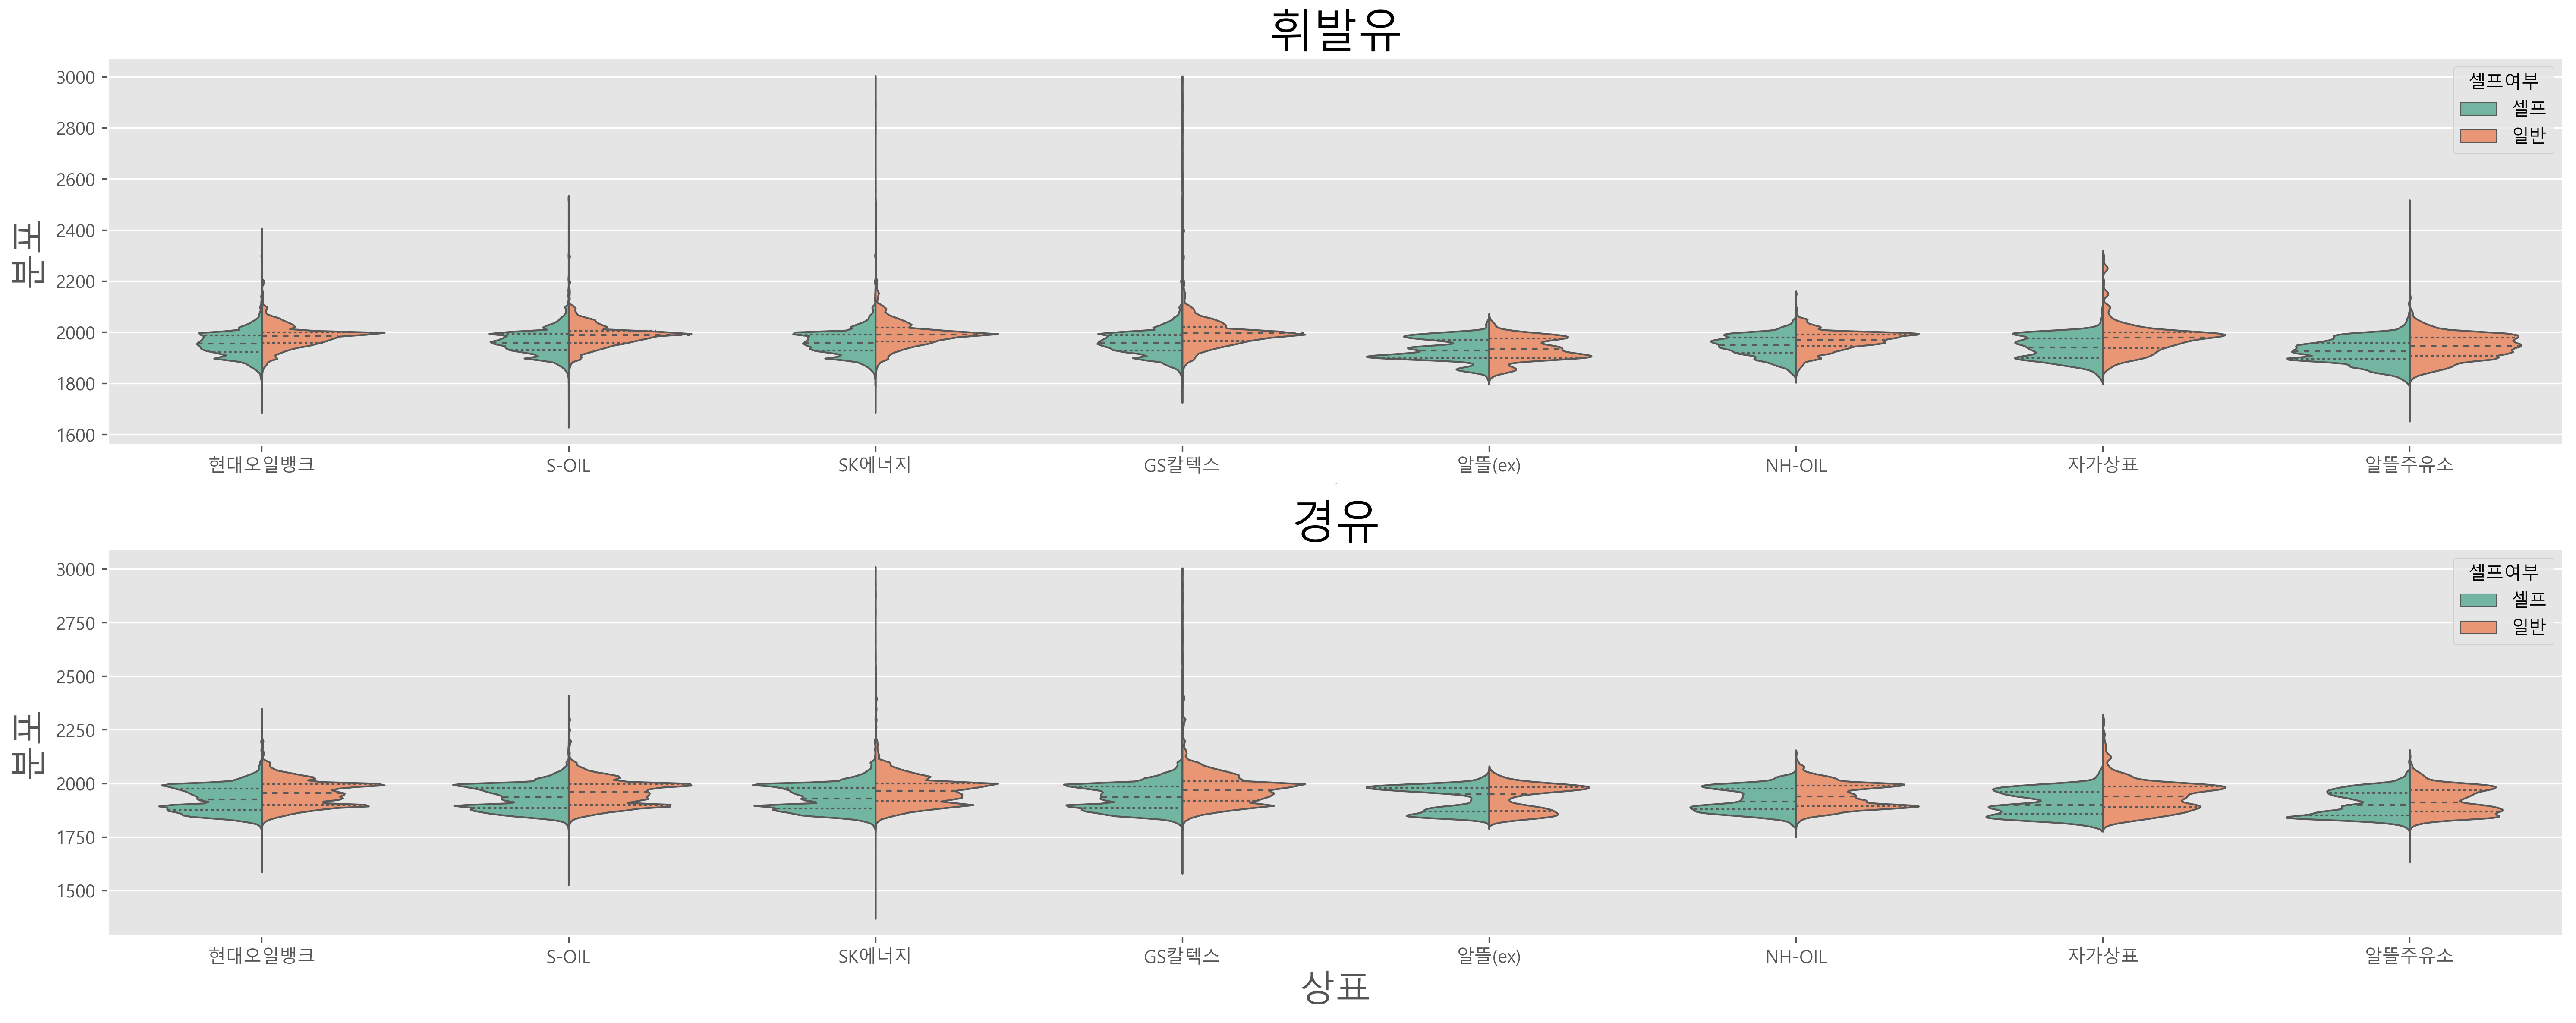

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(20,8), dpi=300)

sns.violinplot(data=df1, x="상표", y="휘발유", hue="셀프여부",
               split=True, inner="quart", linewidth=1, palette="Set2",ax=ax[0]
               )
ax[0].set_title('휘발유', fontsize=25)
ax[0].set_ylabel('분포',fontsize=20)
ax[0].set_xlabel('상표',fontsize=0)

sns.violinplot(data=df1, x="상표", y="경유", hue="셀프여부",
               split=True, inner="quart", linewidth=1, palette="Set2",ax=ax[1]
               )
ax[1].set_title('경유', fontsize=25)
ax[1].set_ylabel('분포',fontsize=20)
ax[1].set_xlabel('상표',fontsize=20)

plt.tight_layout()
plt.show()

### 각 지역의 셀프 여부별 주유소 개수

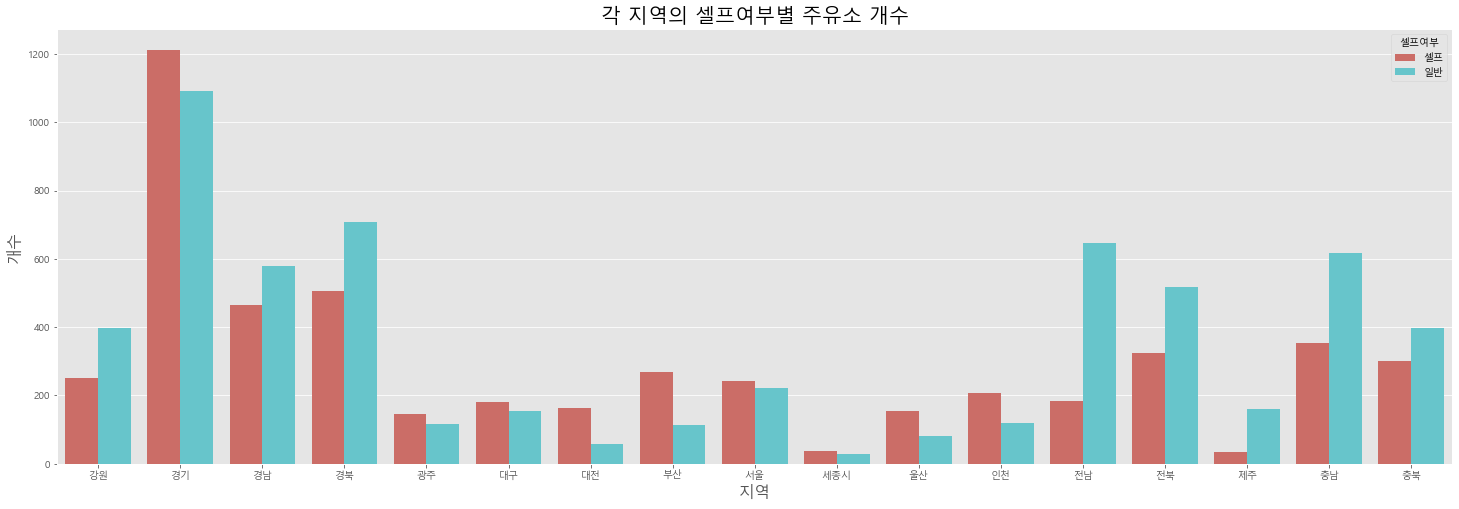

In [45]:
data = df1[['시','상호','상표','셀프여부']].drop_duplicates()

plt.figure(figsize = (25,8))
ax = sns.countplot(x = '시', data = data, palette = 'hls',hue='셀프여부')
ax.set_title(label = '각 지역의 셀프여부별 주유소 개수', fontsize = 20)
ax.set_xlabel(xlabel = '지역', fontsize = 16)
ax.set_ylabel(ylabel = '개수', fontsize = 16)
plt.show()

## 지역별 유가 비교

In [118]:
# 경유, 휘발유값 상위 10곳
data = df1.pivot_table(index='구',values=['휘발유','경유']).sort_values(by='휘발유',ascending=False).reset_index()
data1 = data[:10]
data1

,구,경유,휘발유
0,용산구,2344.004144,2379.030387
1,종로구,2210.879237,2255.845339
2,울릉군,2113.293785,2203.745763
3,강남구,2101.912666,2144.728294
4,성동구,2033.814556,2072.525424
5,강동구,2025.846247,2067.048426
6,영도구,2032.977966,2060.854237
7,서초구,2028.291118,2058.677083
8,옹진군,2034.581790,2053.581790
9,성남시,2013.002053,2042.085362


In [50]:
import pandas as pd
import numpy as np
import bar_chart_race as bcr

#### 필요한 전처리작업

In [136]:
# 행은 'season', 열은 'team', 데이터는 points로 데이터 프레임 변경
data = df.pivot_table(values = '휘발유', index = '기간', columns = '지역')
# 확인
data = data.iloc[1:,:]
data = data.iloc[:-1,:]
data.head()

지역,강원 강릉시,강원 고성군,강원 동해시,강원 삼척시,강원 속초시,강원 양구군,강원 양양군,강원 영월군,강원 원주시,강원 인제군,...,충북 단양군,충북 보은군,충북 영동군,충북 옥천군,충북 음성군,충북 제천시,충북 증평군,충북 진천군,충북 청주시,충북 충주시
기간,,,,,,,,,,,,,,,,,,,,,
2022-04-10,1978.226190,1890.388889,1976.666667,1940.225806,1977.363636,1804.6,1997.000000,1829.458333,1923.480769,1999.120000,...,1960.838710,2018.413793,1949.068966,1995.878788,1982.631579,1868.901408,1991.500,1967.655172,1973.247706,1974.186047
2022-04-11,1977.750000,1889.833333,1973.151515,1939.258065,1975.545455,1804.6,1994.666667,1905.041667,1941.171429,1919.538462,...,1958.903226,2018.413793,2015.965517,1994.727273,2006.435897,1895.225352,1985.875,2000.913793,1962.281818,1949.302326
2022-04-12,1954.440476,1889.833333,1909.147059,1937.967742,1971.909091,1804.6,1993.000000,1904.208333,1936.903846,1997.192308,...,2018.967742,2018.413793,2014.275862,1992.090909,2004.679487,1919.718310,1984.625,1998.689655,1958.022727,1971.081395
2022-04-13,1952.988095,1888.722222,1909.617647,1936.677419,1969.000000,1806.6,1993.000000,1903.280000,1933.333333,1995.653846,...,2017.741935,2015.310345,2015.310345,1990.969697,2003.615385,1916.676056,1982.125,1996.862069,1955.595455,1968.000000
2022-04-14,1952.916667,1888.722222,1908.294118,1936.677419,1967.636364,1804.6,1992.166667,1901.680000,1931.076190,1995.653846,...,2017.741935,2015.137931,2015.310345,1991.151515,2000.038462,1913.211268,1981.500,1996.000000,1954.149321,1966.546512


In [137]:
from datetime import datetime
df_resample = data.resample(rule='W').mean()
df_resample

지역,강원 강릉시,강원 고성군,강원 동해시,강원 삼척시,강원 속초시,강원 양구군,강원 양양군,강원 영월군,강원 원주시,강원 인제군,...,충북 단양군,충북 보은군,충북 영동군,충북 옥천군,충북 음성군,충북 제천시,충북 증평군,충북 진천군,충북 청주시,충북 충주시
기간,,,,,,,,,,,,,,,,,,,,,
2022-04-10,1978.226190,1890.388889,1976.666667,1940.225806,1977.363636,1804.600000,1997.000000,1829.458333,1923.480769,1999.120000,...,1960.838710,2018.413793,1949.068966,1995.878788,1982.631579,1868.901408,1991.500000,1967.655172,1973.247706,1974.186047
2022-04-17,1956.010204,1889.039683,1909.193914,1936.585253,1969.331169,1891.971429,1993.357143,1902.750000,1933.069257,1983.549451,...,2007.488479,2014.817734,2013.334975,1991.528139,1996.939560,1902.873239,1981.562500,1996.625616,1958.786969,1963.388704
2022-04-24,1971.073129,1882.000000,1966.138655,1934.626728,1965.194805,2007.800000,1988.957516,1900.377143,1924.325170,1985.972527,...,2006.400922,2007.817734,2006.610837,1990.398268,1964.205955,1864.384363,1974.178571,1991.738916,1951.258808,1950.345515
2022-05-01,1969.302721,1877.894491,1965.343010,1922.909545,1961.843228,2005.100000,1986.730159,1898.441299,1924.372789,1973.170330,...,2005.435155,1986.851378,2004.886700,1991.497835,1968.056348,1848.230471,1969.571429,1992.212878,1942.995644,1956.421831
2022-05-08,1937.413265,1844.436508,1932.911765,1901.638095,1929.642857,1945.742857,1948.198413,1881.211429,1895.338776,1958.000000,...,1985.331797,1981.744898,1965.014778,1961.878788,1963.128205,1895.207243,1961.669643,1975.298030,1930.557398,1929.187192
2022-05-15,1951.850340,1905.277311,1945.591649,1903.995238,1938.785714,1965.785714,1950.174603,1890.422857,1899.818059,1971.351648,...,2000.202765,1964.077410,1986.083744,1956.939394,1973.406593,1925.177062,1964.098214,1970.832512,1943.370536,1939.779221
2022-05-22,1958.963671,1989.680672,1971.861345,1927.590476,1971.662338,1937.785714,1979.753968,1907.474286,1933.154987,1984.934066,...,2016.631336,1974.704433,1995.433498,1976.454545,1968.501832,1944.164990,1984.650210,1976.413793,1959.427660,1954.310667
2022-05-29,2001.129825,2013.941176,1991.319328,1960.542857,2003.792208,1832.200000,2019.103175,1931.668571,1964.836927,2012.851648,...,2032.668203,2004.142857,2018.399015,2008.298701,1985.679915,1985.637827,1999.095238,1993.455665,1999.260583,1985.908507
2022-06-05,2004.361446,2041.403361,2005.403361,1966.526267,2018.818182,1847.357143,2030.182540,1951.285714,1965.042831,2031.917582,...,2047.377880,2020.876847,1982.128079,2024.281385,2011.875957,1987.776660,2004.476190,2020.312808,2004.111681,2005.990369


In [138]:
import matplotlib as mpl
mpl.rcParams['font.family'] ='Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] =False

In [94]:
# bcr.bar_chart_race(df = df_resample, 
#                    n_bars = 10,
#                    figsize=(6, 4),
#                    period_length = 1500,
#                    steps_per_period = 50,
#                    sort='desc',
                   
#                    title='지역별 유가 추이')

In [78]:
from IPython.display import Video
Video("지역별유가.mp4")

## 최근 2달간의 경유와 휘발유 추이 비교

휘발유 경유 가격 영향 기사 http://news.bizwatch.co.kr/article/industry/2022/05/09/0005

In [127]:
df1

,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,위도,경도,시,구,년,월,일,요일
0,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-09,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,9,Saturday
1,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-10,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,10,Sunday
2,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-11,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,11,Monday
3,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-12,현대오일뱅크,셀프,2050.0,1908.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,12,Tuesday
4,강원 강릉시,(주)강릉햇살 유천주유소,강원도 강릉시 사임당로 178,2022-04-13,현대오일뱅크,셀프,2050.0,1898.0,1838.0,0.0,37.766299,128.861114,강원,강릉시,2022,4,13,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308781,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-02,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000,충북,충주시,2022,6,2,Thursday
308782,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-03,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000,충북,충주시,2022,6,3,Friday
308783,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-04,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000,충북,충주시,2022,6,4,Saturday
308784,충북 충주시,희망주유소,충북 충주시 금봉대로 398,2022-06-05,GS칼텍스,일반,0.0,1995.0,1995.0,1500.0,36.970249,127.947000,충북,충주시,2022,6,5,Sunday


In [144]:
x1 = df1['휘발유']
x2 = df1['경유']

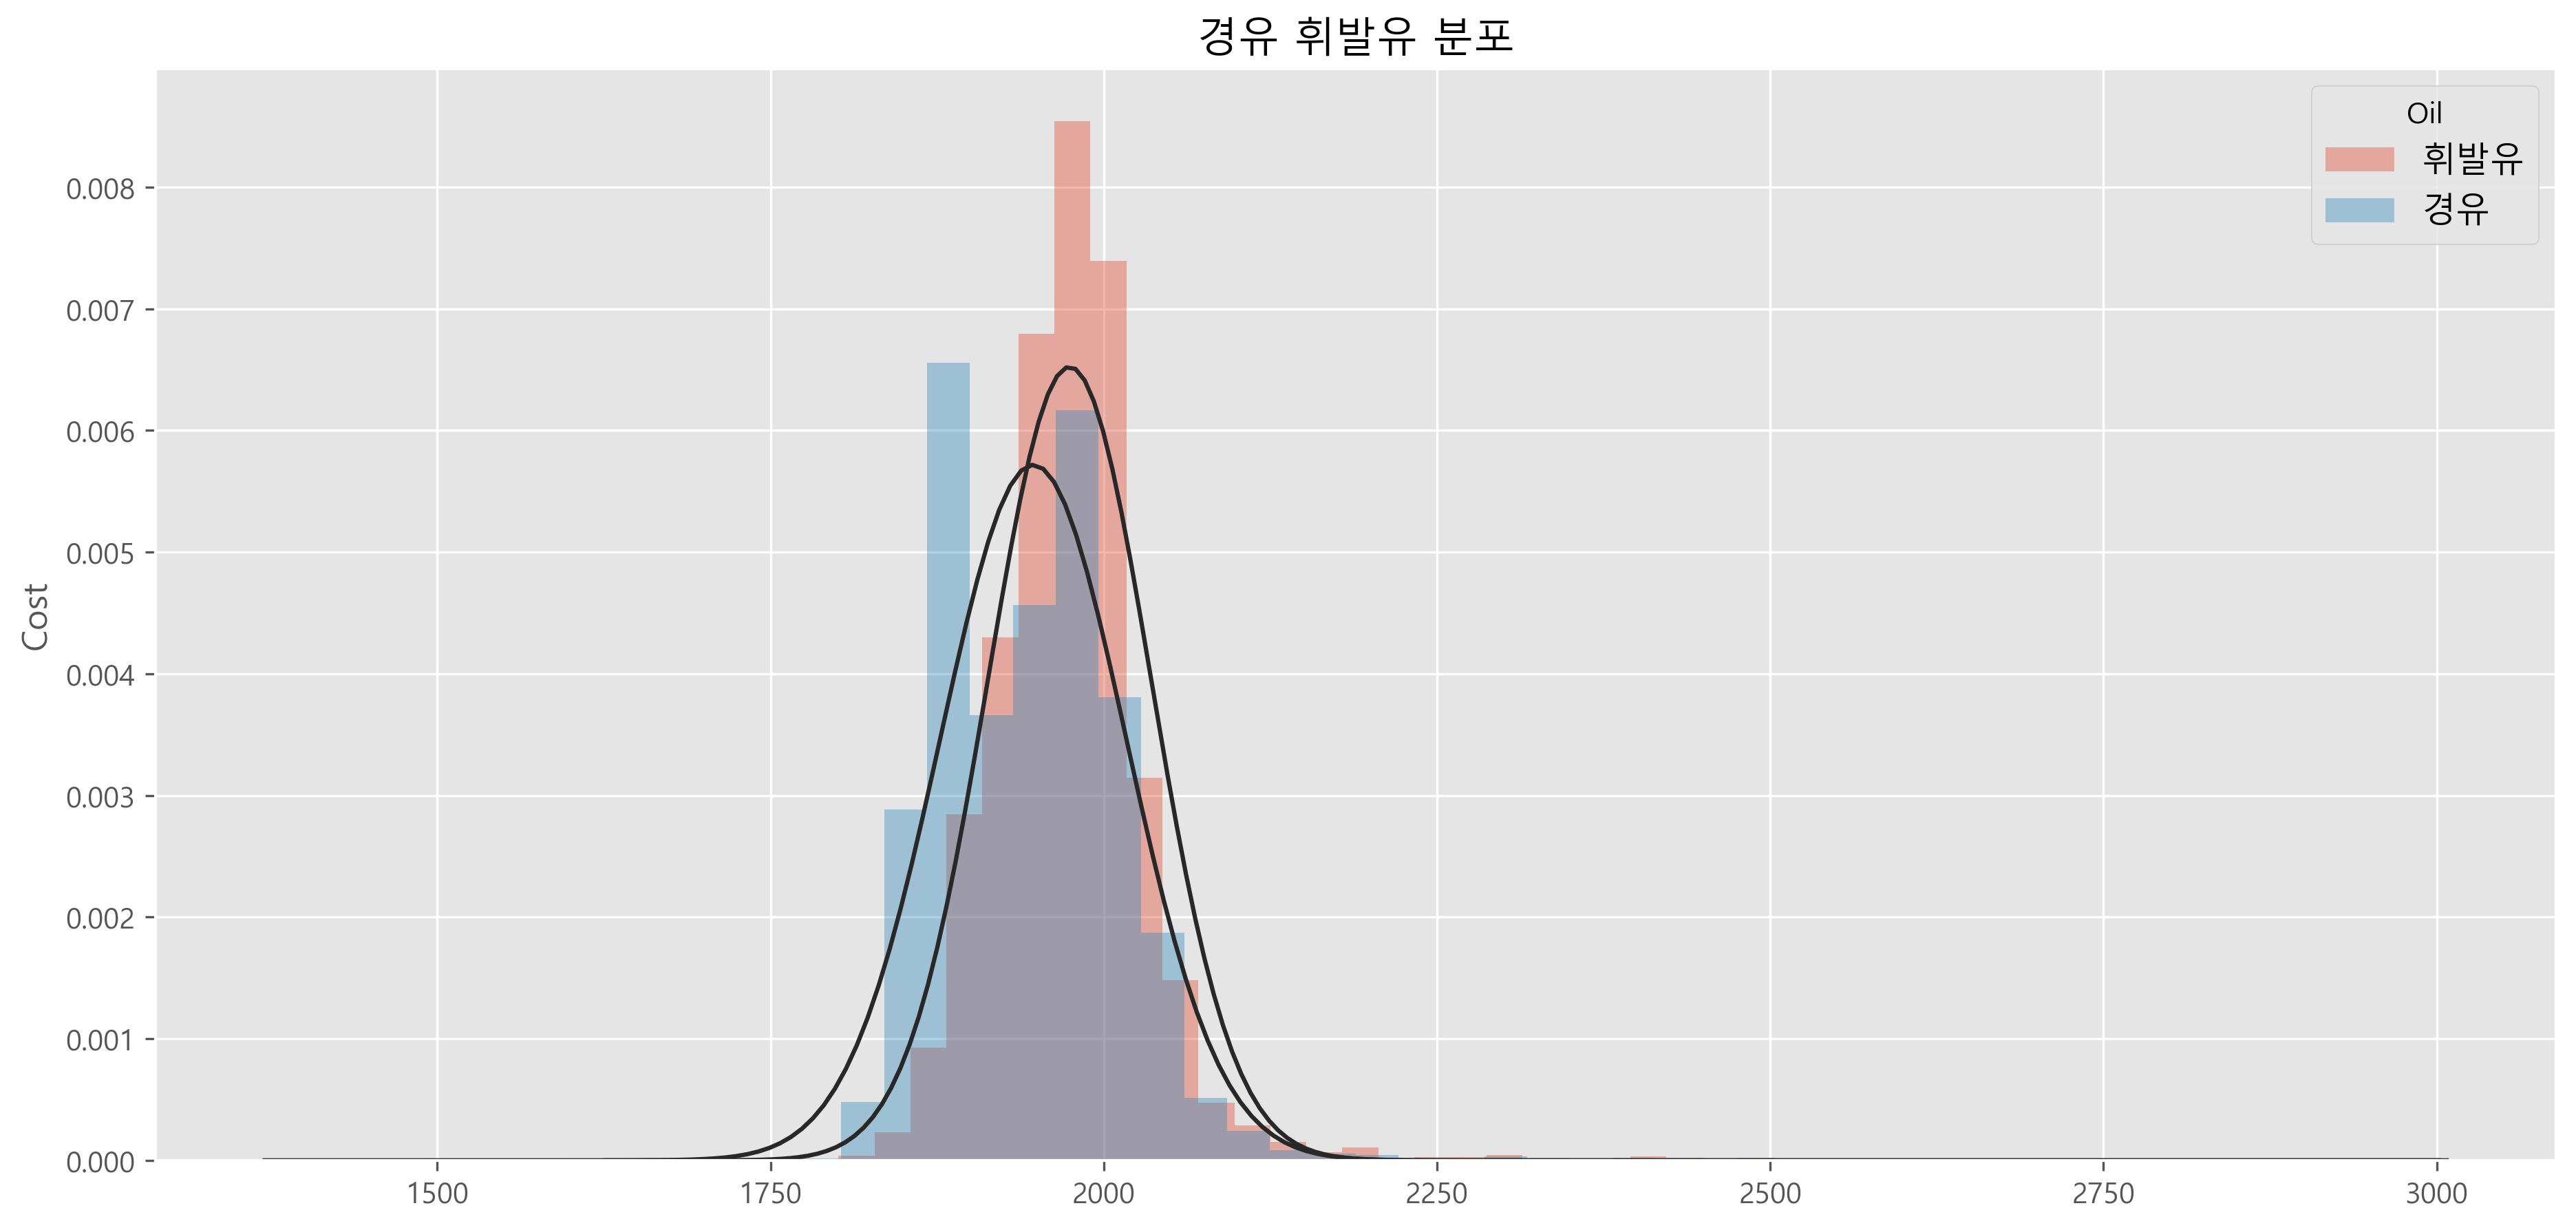

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.plot(x1,label='휘발유')
# plt.plot(x2,label='경유')

fig, ax = plt.subplots(figsize=(15,7), dpi=300)
sns.distplot(x1, kde=False, fit=stats.norm,label='휘발유')
sns.distplot(x2, kde=False, fit=stats.norm,label='경유')
plt.title('경유 휘발유 분포')
plt.xlabel('')
plt.ylabel('Cost')
plt.legend(prop={'size': 12}, title = 'Oil')
plt.show()

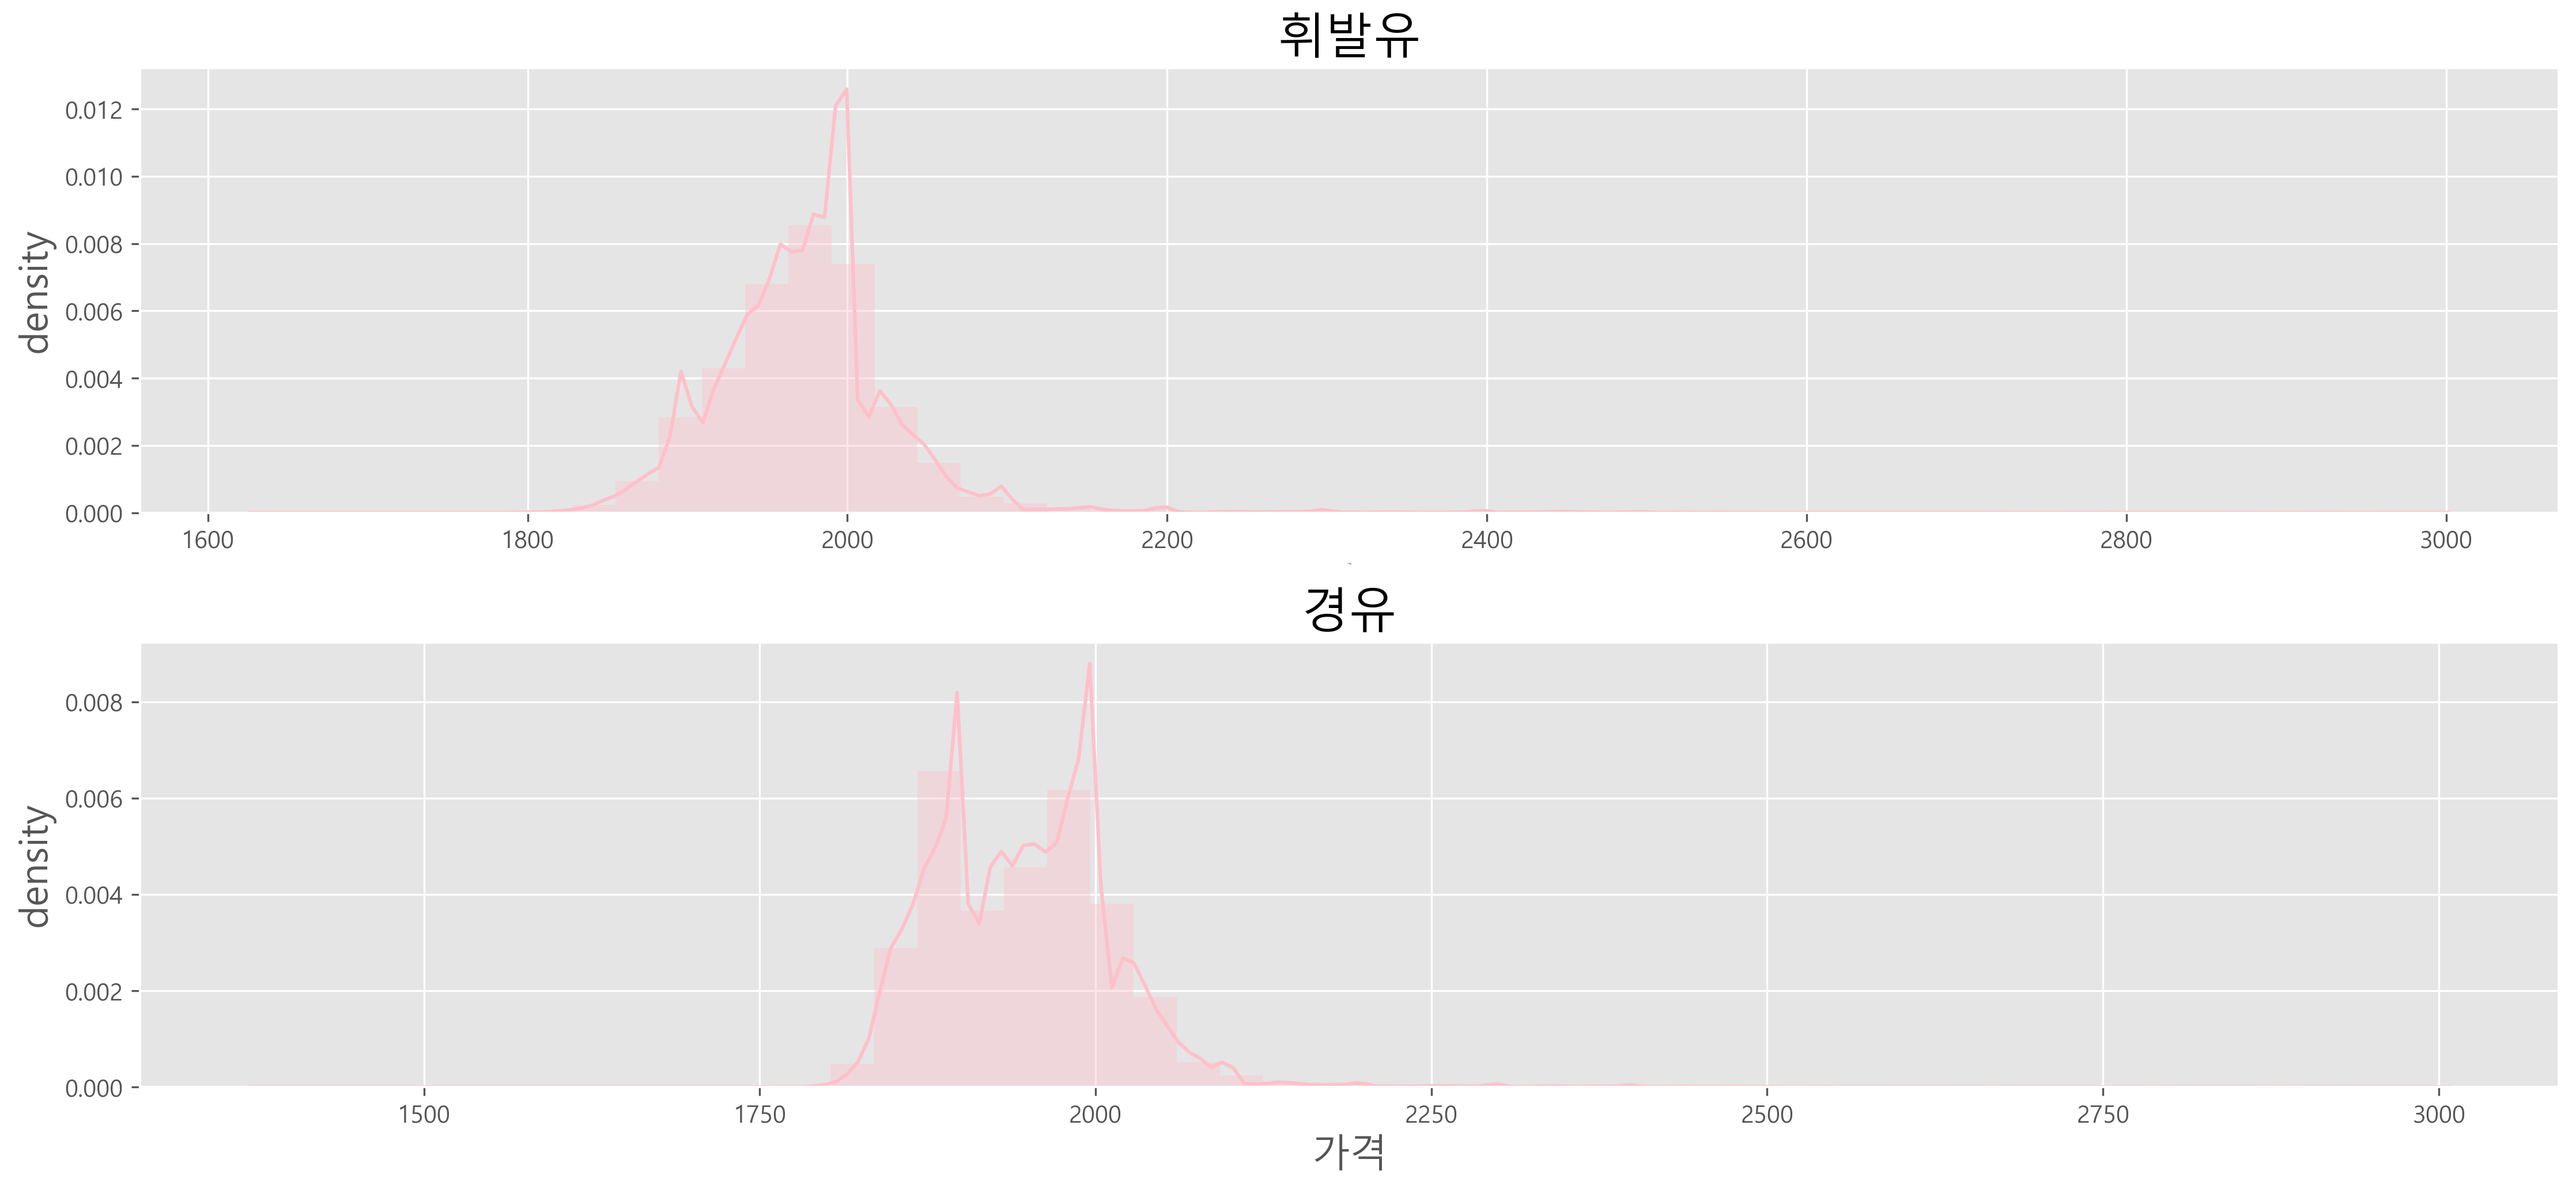

In [116]:
fig, ax = plt.subplots(2, 1, figsize=(15,7), dpi=300)

sns.distplot(df1['휘발유'], color = 'pink',ax=ax[0])
ax[0].set_title('휘발유', fontsize = 20)
ax[0].set_xlabel('가격', fontsize = 0)
ax[0].set_ylabel('density', fontsize = 16)

sns.distplot(df1['경유'], color = 'pink',ax=ax[1])
ax[1].set_title('경유', fontsize = 20)
ax[1].set_xlabel('가격', fontsize = 16)
ax[1].set_ylabel('density', fontsize = 16)

plt.tight_layout()
plt.show()

In [77]:
bcr.bar_chart_race(df = df_oil, 
                   n_bars = 2,
                   figsize=(6, 4),
                   period_length = 500,
                   steps_per_period = 50,
                   sort='desc',
                   title='국내 유가 추이')

In [76]:
from IPython.display import Video

Video("휘발유 경유.mp4")

In [ ]:
import numpy as np
import scipy.stats as stats

two_sample = stats.ttest_ind(int_diesel, int_gasoline)
two_sample = stats.ttest_ind(int_diesel, int_gasoline, equal_var = True)
# equal_var=True(default): 등분산을 만족한 경우
print(two_sample.pvalue)
print(two_sample)

In [ ]:
print(np.mean(diesel))
print(np.mean(gasoline))

경유 등유 가격 비교
지역별 유가 비교 (수도권과 지방의 차이)
상표별 유가 비교
셀프여부 가격 비교
https://u-n-joe.tistory.com/108

https://github.com/Team-COSADAMA/Data-Science-Intro/blob/main/week5/9-3.ipynb

국제 유가 흐름(우크라이나 전쟁)
https://earningbirds.netlify.app/visualization/covid19-visualization-with-plotly/


지역별 유가 시각화(지도,plotly 애니메이션)
https://nbviewer.org/github/kjbpoles/Python_DataAnalytics/blob/master/DataScience/source_code/04.%20Self%20Oil%20Station%20price.ipynb

https://thlee33.medium.com/plotly%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%A7%80%EB%8F%84-%EC%95%A0%EB%8B%88%EB%A9%94%EC%9D%B4%EC%85%98-5e11fe528e4d

https://thlee33.medium.com/%EC%A0%95%EB%9F%89-%EC%86%8D%EC%84%B1%EC%9D%84-%EB%B0%98%EC%98%81%ED%95%9C-hot-spot-%EB%B6%84%EC%84%9D-b3ce471d2964

https://dailyheumsi.tistory.com/category/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%99%80%20%ED%95%A8%EA%BB%98%20%ED%83%B1%EA%B3%A0%EB%A5%BC/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94

머신러닝 유가 예측
https://velog.io/@nuguoil